In [10]:
import os
import pickle
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [11]:
DATA_DIR = '/Users/shriya_alladi/Desktop/Object-Detection/data'

In [12]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

In [13]:
hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)

Reading image: 63.jpg


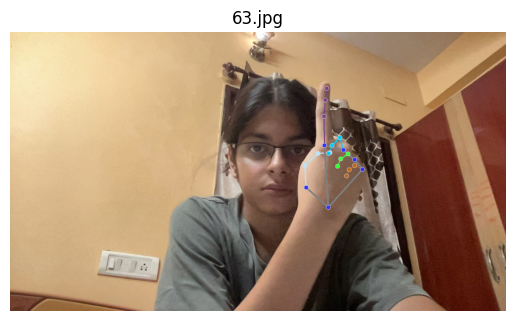

Reading image: 63.jpg


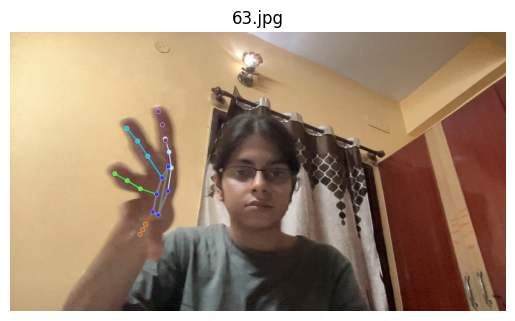

Reading image: 63.jpg


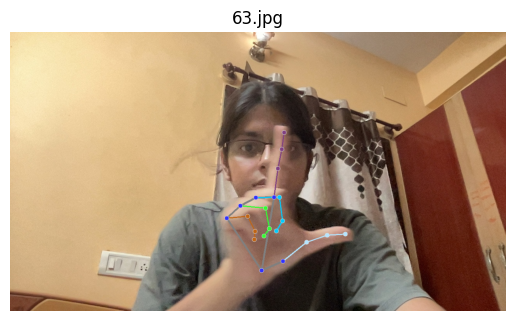

Reading image: 63.jpg


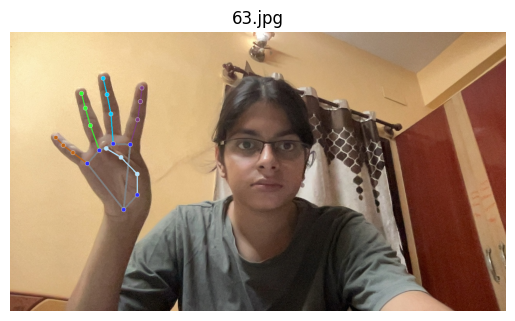

Reading image: 63.jpg


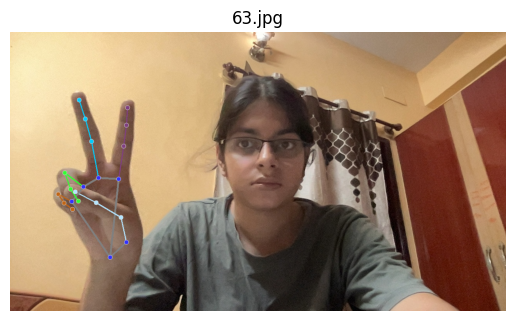

Reading image: 63.jpg


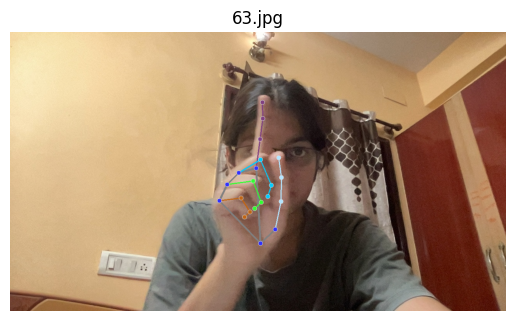

Reading image: 63.jpg


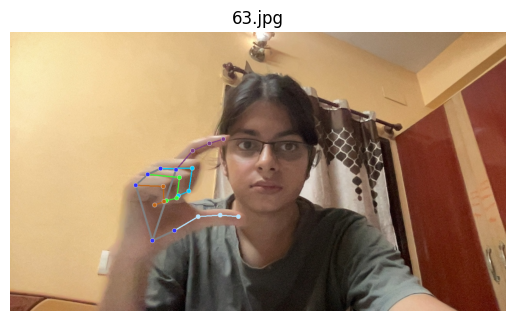

Reading image: 63.jpg


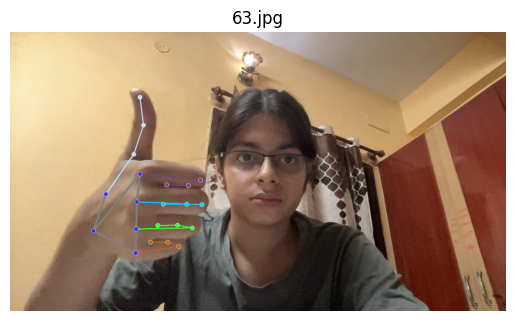

In [14]:
data = []
labels = []


for dir_ in os.listdir(DATA_DIR):
    dir_path = os.path.join(DATA_DIR, dir_)
    if not os.path.isdir(dir_path):  # Check if it's a directory
        continue
    
    img_paths = os.listdir(dir_path)
    if not img_paths:  # Check if directory is empty
        continue
    
    img_path = img_paths[0]  # Take the first image in the directory
    print("Reading image:", img_path)
    
    img = cv2.imread(os.path.join(dir_path, img_path))
    if img is None:
        print("Error: Unable to read image", img_path)
        continue
    
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    results = hands.process(img_rgb)
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(
                img_rgb,  #image to draw
                hand_landmarks, #model output
                mp_hands.HAND_CONNECTIONS,  #hand connections
                mp_drawing_styles.get_default_hand_landmarks_style(),
                mp_drawing_styles.get_default_hand_connections_style())

            for i in range(len(hand_landmarks.landmark)): #Details of the hand landmarks stored as an array
                                                          #Only considering x and y coordinates
                x = hand_landmarks.landmark[i].x
                y = hand_landmarks.landmark[i].y

    plt.figure()
    plt.imshow(img_rgb)
    plt.title(img_path)
    plt.axis('off')  # Turn off axis labels
    plt.show()
    

In [15]:
data = []
labels = []

for dir_ in os.listdir(DATA_DIR):
    dir_path = os.path.join(DATA_DIR, dir_)
    if not os.path.isdir(dir_path):  # Skip non-directory files like .DS_Store
        continue
    
    for img_path in os.listdir(dir_path):
        if not img_path.endswith('.jpg') and not img_path.endswith('.jpeg') and not img_path.endswith('.png'):
            continue
        
        img_path_full = os.path.join(dir_path, img_path)
        print("Reading image:", img_path_full)
        
        img = cv2.imread(img_path_full)
        if img is None:
            print("Error: Unable to read image", img_path_full)
            continue
        
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        results = hands.process(img_rgb)
        if results.multi_hand_landmarks:
            data_aux = []
            for hand_landmarks in results.multi_hand_landmarks:
                for i in range(len(hand_landmarks.landmark)):
                    x = hand_landmarks.landmark[i].x
                    y = hand_landmarks.landmark[i].y
                    data_aux.append(x)
                    data_aux.append(y)

            data.append(data_aux)
            labels.append(dir_)
             

Reading image: /Users/shriya_alladi/Desktop/Object-Detection/data/9/63.jpg
Reading image: /Users/shriya_alladi/Desktop/Object-Detection/data/9/77.jpg
Reading image: /Users/shriya_alladi/Desktop/Object-Detection/data/9/88.jpg
Reading image: /Users/shriya_alladi/Desktop/Object-Detection/data/9/89.jpg
Reading image: /Users/shriya_alladi/Desktop/Object-Detection/data/9/76.jpg
Reading image: /Users/shriya_alladi/Desktop/Object-Detection/data/9/62.jpg
Reading image: /Users/shriya_alladi/Desktop/Object-Detection/data/9/74.jpg
Reading image: /Users/shriya_alladi/Desktop/Object-Detection/data/9/60.jpg
Reading image: /Users/shriya_alladi/Desktop/Object-Detection/data/9/48.jpg
Reading image: /Users/shriya_alladi/Desktop/Object-Detection/data/9/49.jpg
Reading image: /Users/shriya_alladi/Desktop/Object-Detection/data/9/61.jpg
Reading image: /Users/shriya_alladi/Desktop/Object-Detection/data/9/75.jpg
Reading image: /Users/shriya_alladi/Desktop/Object-Detection/data/9/59.jpg
Reading image: /Users/shr

In [16]:
f = open('data.pickle','wb')
pickle.dump({'data':data, 'labels':labels},f)
f.close()